In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:\DataSets\ML\cleaned_KnnImputerdata.csv")

In [3]:
df.drop(df.columns[0], axis = 1 , inplace = True )

In [4]:
df.dropna(inplace = True)

In [5]:
col_names = list(df.columns)

In [6]:
y=df[df.columns[-1]]
y.value_counts()

TFTP             85512
Syn              27668
MSSQL            24652
DrDoS_SNMP       21856
DrDoS_DNS        21686
DrDoS_MSSQL      19308
DrDoS_NetBIOS    17588
UDP              16447
NetBIOS          15563
DrDoS_UDP        13237
DrDoS_SSDP       11184
DrDoS_LDAP        9090
LDAP              8228
DrDoS_NTP         5131
UDP-lag           1536
Portmap            805
BENIGN             487
Name:  Label, dtype: int64

In [7]:
new_lab= df.replace({ 
'BENIGN'         : 0 ,  
'TFTP'           : 1 , 
'UDP'             : 2  ,
'MSSQL'          : 3   ,        
  'NetBIOS'   : 4 ,       
'DrDoS_DNS'      : 5 , 
'DrDoS_MSSQL'    : 6 ,     
'DrDoS_NetBIOS'  : 7 ,     
       'Syn'    : 8 ,  
'DrDoS_SNMP'        : 9 ,  
'DrDoS_UDP'      : 10 , 
'DrDoS_SSDP'     : 11 ,  
'DrDoS_LDAP'     : 12 ,   
'LDAP'            : 13 ,   
'DrDoS_NTP'      : 14 ,    
'UDP-lag'        : 15 ,    
'Portmap'         : 16 ,
'UDPLag'        : 17,
'WebDDoS'         : 18 
  },inplace = True )

In [8]:
f0 = df[df[' Label'] == 0].sample(n=487)

f1 = df[df[' Label']  == 4].sample(n=10000)

f2 = df[df[' Label']  == 1].sample(n=10000)

f3 = df[df[' Label']  == 2].sample(n=10000)


f4 = df[df[' Label']  == 3].sample(n=10000)

In [9]:
dd = pd.concat([f0,f1,f2,f3,f4])

dd

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
298342,6.0,60146053.0,17.0,16.0,912.0,16820.0,180.0,0.0,53.647059,76.086251,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0
86945,17.0,40555.0,200.0,0.0,88000.0,0.0,440.0,440.0,440.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.0,0
1202,6.0,52096.0,2.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0
125170,17.0,1.0,2.0,0.0,1420.0,0.0,710.0,710.0,710.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.0,0
51407,17.0,34903643.0,6.0,0.0,1800.0,0.0,300.0,300.0,300.000000,0.000000,...,5806516.0,0.0,5806516.0,5806516.0,9699042.333,3568943.822,13678579.0,6782006.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,17.0,2.0,2.0,0.0,2864.0,0.0,1432.0,1432.0,1432.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.0,3
26737,17.0,1.0,2.0,0.0,1886.0,0.0,943.0,943.0,943.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.0,3
15843,17.0,1.0,2.0,0.0,994.0,0.0,497.0,497.0,497.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.0,3
33229,17.0,1.0,2.0,0.0,892.0,0.0,446.0,446.0,446.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1.0,3


In [10]:
xx = dd[dd.columns[:-1]]
 
yy = dd[dd.columns[-1]]
 

In [11]:
from imblearn.over_sampling import SMOTE
# Oversample the data using SMOTE
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(xx, yy)

In [12]:
# Combine the features and labels
oversampled_data = np.column_stack((X_resampled, y_resampled))

In [13]:
print(oversampled_data.shape)
oversampled_data


(50000, 80)


array([[6.00000000e+00, 6.01460530e+07, 1.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.70000000e+01, 4.05550000e+04, 2.00000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 5.20960000e+04, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.50161486e+00, 2.00000000e+00, 2.77258047e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.70000000e+01, 4.59949001e+04, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 3.47026924e+04, 4.62002100e+00, ...,
        0.00000000e+00, 6.20021002e-01, 0.00000000e+00]])

In [14]:
# Save the oversampled data to a CSV file
oversampled_data_df = pd.DataFrame(oversampled_data, columns=col_names)
oversampled_data_df.to_csv('CICDDoS2019_oversampled.csv', index=False)

In [15]:
n = pd.read_csv('CICDDoS2019_oversampled.csv')
n.head()

n[' Label'].unique()

array([0., 4., 1., 2., 3.])

In [16]:
n[n.columns[-1]].value_counts()

0.0    10000
4.0    10000
1.0    10000
2.0    10000
3.0    10000
Name:  Label, dtype: int64

In [17]:
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(n.iloc[:, :-1], n.iloc[:, -1:], test_size = 0.3, random_state=1)

In [18]:
X_train.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
8950,17.0,1.0,2.0,0.0,458.0,0.0,229.0,229.0,229.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38421,17.0,48.0,2.0,0.0,1014.0,0.0,507.0,507.0,507.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19363,17.0,1.0,2.0,0.0,1032.0,0.0,516.0,516.0,516.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30157,17.0,218484.0,6.0,0.0,2088.0,0.0,393.0,321.0,348.0,35.08846,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14294,17.0,2999857.0,4.0,0.0,2064.0,0.0,516.0,516.0,516.0,0.00000,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
y_train.head()

,Label
8950,4.0
38421,3.0
19363,1.0
30157,2.0
14294,1.0


In [20]:
# Feature scaling
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
# Training / Test Dataframe
#
cols =  dd.columns[:-1] 
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [22]:
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
#
# Train the mode
#
forest.fit(X_train_std, y_train.values.ravel())


RandomForestClassifier(n_estimators=500, random_state=1)

In [23]:
import numpy as np
 
importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1)  Min Packet Length             0.089710
 2)  Fwd Packet Length Mean        0.085835
 3)  Fwd Packet Length Min         0.083990
 4)  Avg Fwd Segment Size          0.082346
 5)  Packet Length Mean            0.079745
 6)  Max Packet Length             0.077626
 7)  Fwd Packet Length Max         0.075820
 8)  Average Packet Size           0.066025
 9) Total Length of Fwd Packets    0.057008
10)  Subflow Fwd Bytes             0.054046
11) Flow Bytes/s                   0.019944
12)  Inbound                       0.018180
13)  Protocol                      0.015614
14)  Flow IAT Max                  0.012290
15)  Flow Packets/s                0.011628
16)  Flow Duration                 0.011329
17) Init_Win_bytes_forward         0.011287
18)  Flow IAT Mean                 0.009861
19)  Flow IAT Std                  0.009669
20)  Fwd IAT Mean                  0.007682
21)  Fwd IAT Max                   0.007419
22)  Fwd IAT Std                   0.007176
23) Fwd Packets/s               

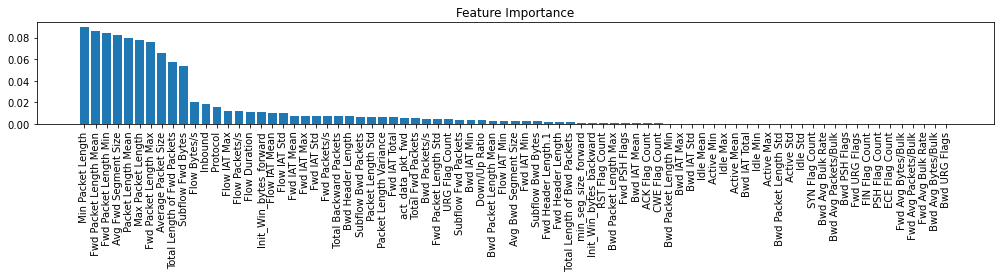

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=[14,4])
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [25]:
selected_features = []
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30,feat_labels[sorted_indices[f]],importances[sorted_indices[f]]))
    if importances[sorted_indices[f]] > 0.05 :
      selected_features.append(feat_labels[sorted_indices[f]])

In [26]:
selected_features

[' Min Packet Length',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Min',
 ' Avg Fwd Segment Size',
 ' Packet Length Mean',
 ' Max Packet Length',
 ' Fwd Packet Length Max',
 ' Average Packet Size',
 'Total Length of Fwd Packets',
 ' Subflow Fwd Bytes']

In [27]:
new_df = n[selected_features]
new_df

,Min Packet Length,Fwd Packet Length Mean,Fwd Packet Length Min,Avg Fwd Segment Size,Packet Length Mean,Max Packet Length,Fwd Packet Length Max,Average Packet Size,Total Length of Fwd Packets,Subflow Fwd Bytes
0,0.000000,53.647059,0.000000,53.647059,521.529412,2920.000000,180.000000,537.333333,912.000000,912.000000
1,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,442.200000,88000.000000,88000.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,1065.000000,1420.000000,1420.000000
4,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,350.000000,1800.000000,1800.000000
...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,15.500000,0.000000,15.500000,20.666667,31.000000,31.000000,31.000000,31.000000,31.000000
49996,505.986349,505.986349,505.986349,505.986349,505.986349,505.986349,505.986349,651.873777,1868.818673,1868.818673
49997,95.830715,305.457549,95.830715,305.457549,401.193145,688.399934,688.399934,550.123399,825.177414,825.177414
49998,36.505102,36.505102,36.505102,36.505102,47.938338,65.088192,36.505102,59.922923,73.010204,73.010204


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [29]:
# Split data into features and labels
X = n[selected_features] # include selected features here
y = n[' Label']


In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy:  0.9751333333333333
[[2753  104   36   57   26]
 [  22 2969    1    0    0]
 [  10    0 2928   42    0]
 [  58    2   11 2921    0]
 [   3    0    1    0 3056]]
Accuracy per class: {0: 0.8970348647768003, 1: 0.9583602324080052, 2: 0.9666556619346319, 3: 0.9450016175994823, 4: 0.9902786779001944}


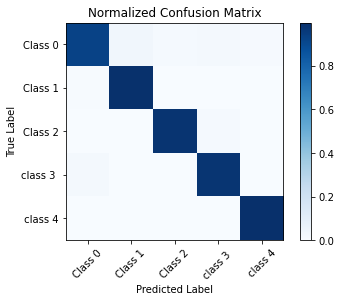

In [33]:
# Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=20)

# Train the classifier
rfc.fit(X_train, y_train)

# Predict on test data
y_pred = rfc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the accuracy for each class label
accuracy_per_class = {}
for i in range(len(cm)):
    tp = cm[i,i]
    fp = sum(cm[:,i]) - tp
    fn = sum(cm[i,:]) - tp
    accuracy_per_class[i] = tp / (tp + fp + fn)

print("Accuracy per class:", accuracy_per_class)



# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'class 3 ', ' class 4']

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [34]:
#create list of model and accuracy dicts
perform_list = [ ]

def run_model(model_name, est_c, est_pnlty):

  mdl=''

  if model_name == 'Logistic Regression':

    mdl = LogisticRegression()


  elif model_name == 'Multinomial Naive Bayes':

    mdl = MultinomialNB(alpha=0.1,fit_prior=True)

  elif model_name == 'Support Vector Classifer':

    mdl = SVC()

  elif model_name == 'Decision Tree Classifier':

    mdl = DecisionTreeClassifier()

  elif model_name == 'K Nearest Neighbour':

    mdl = KNeighborsClassifier(n_neighbors=5 , metric= 'minkowski' , p = 2)

  elif model_name == 'Gaussian Naive Bayes':

    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)

  oneVsRest.fit(X_train, y_train)

  y_pred = oneVsRest.predict(X_test)

  #  Performance metrics

  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

  # Get precision, recall, f1 scores

  precision, recall, f1score, support = score(y_test, y_pred, average='micro')

  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

  print(f'Precision : {precision}')

  print(f'Recall : {recall}')

  print(f'F1-score : {f1score}')

  # Add performance parameters to list

  perform_list.append(dict([

  ( 'Model', model_name),

  ('Test Accuracy', round(accuracy, 2)),

  ('Precision', round(precision, 2)),

  ('Recall', round(recall, 2)),

  ('F1', round(f1score, 2))

]))


   # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  # Calculate the accuracy for each class label
  accuracy_per_class = {}
  for i in range(len(cm)):
    tp = cm[i,i]
    fp = sum(cm[:,i]) - tp
    fn = sum(cm[i,:]) - tp
    accuracy_per_class[i] = tp / (tp + fp + fn)

  print("Accuracy per class:", accuracy_per_class)



  # Define class labels
  classes = ['Class 0', 'Class 1', 'Class 2', 'class 3 ', ' class 4']

  # Normalize the confusion matrix
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # Plot the confusion matrix
  plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Normalized Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Test Accuracy Score of Basic Logistic Regression: % 71.31
Precision : 0.7130666666666666
Recall : 0.7130666666666666
F1-score : 0.7130666666666666
[[1621   89  123  337  806]
 [   4 1577    1 1391   19]
 [  62   11 1459 1425   23]
 [   0    7    0 2985    0]
 [   1    3    1    1 3054]]
Accuracy per class: {0: 0.532697995399277, 1: 0.5083816892327531, 2: 0.4698872785829308, 3: 0.48568174422388544, 4: 0.7814738996929376}


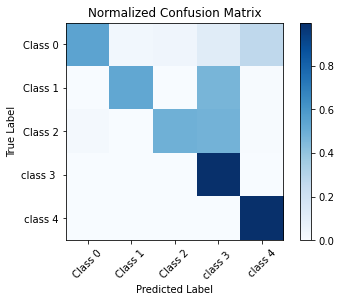

In [35]:
run_model('Logistic Regression')

Test Accuracy Score of Basic Decision Tree Classifier: % 97.37
Precision : 0.9737333333333333
Recall : 0.9737333333333333
F1-score : 0.9737333333333333
[[2732  105   42   60   37]
 [  21 2970    1    0    0]
 [   9    0 2927   42    2]
 [  58    2   11 2921    0]
 [   3    0    1    0 3056]]
Accuracy per class: {0: 0.8907727420932507, 1: 0.9583736689254598, 2: 0.9644151565074135, 3: 0.9440853264382676, 4: 0.9861245563084866}


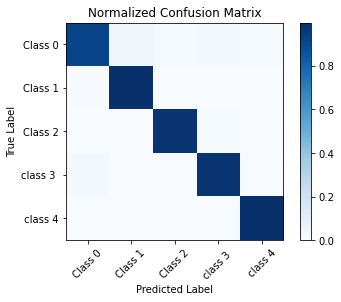

In [36]:

run_model('Decision Tree Classifier')




Test Accuracy Score of Basic Gaussian Naive Bayes: % 79.68
Precision : 0.7968
Recall : 0.7968
F1-score : 0.7968
[[2606  162   75  100   33]
 [  66 2925    1    0    0]
 [  84   70 2825    1    0]
 [ 174 1599  622  597    0]
 [  15    0    4   42 2999]]
Accuracy per class: {0: 0.7861236802413273, 1: 0.6064690026954178, 2: 0.767246061922868, 3: 0.19043062200956937, 4: 0.9696087940510831}


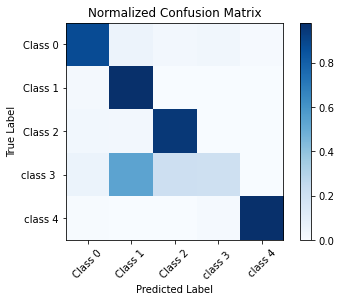

In [37]:
run_model('Gaussian Naive Bayes')

Test Accuracy Score of Basic K Nearest Neighbour: % 96.37
Precision : 0.9637333333333333
Recall : 0.9637333333333333
F1-score : 0.9637333333333333
[[2561  110   45  223   37]
 [  22 2969    1    0    0]
 [  18    0 2914   48    0]
 [  15    3   13 2961    0]
 [   8    0    1    0 3051]]
Accuracy per class: {0: 0.8427114182296808, 1: 0.9561996779388083, 2: 0.9585526315789473, 3: 0.907447134538768, 4: 0.9851469163706813}


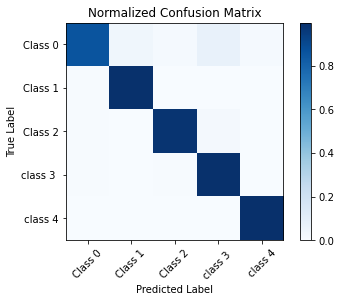

In [38]:
run_model('K Nearest Neighbour')


Test Accuracy Score of Basic Support Vector Classifer: % 78.99
Precision : 0.7899333333333334
Recall : 0.7899333333333334
F1-score : 0.7899333333333334
[[2509   87  146  170   64]
 [  23 1570    8 1391    0]
 [   0   49 1938   50  943]
 [  68    5  141 2778    0]
 [   0    0    6    0 3054]]
Accuracy per class: {0: 0.818063253994131, 1: 0.5011171401212895, 2: 0.5906735751295337, 3: 0.6035194438409732, 4: 0.7509220555692157}


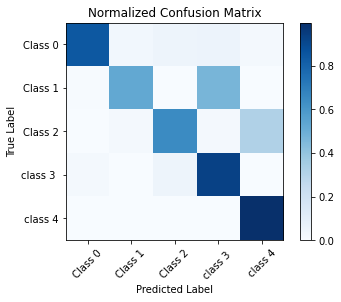

In [39]:
run_model('Support Vector Classifer')

In [40]:
!pip install xgboost


Accuracy: 0.9737333333333333
[[2738  103   35   71   29]
 [  22 2969    1    0    0]
 [  12    0 2926   42    0]
 [  62    2   11 2917    0]
 [   3    0    1    0 3056]]
Accuracy per class: {0: 0.8904065040650406, 1: 0.9586696803358088, 2: 0.9663143989431968, 3: 0.9394524959742351, 4: 0.9893169310456459}


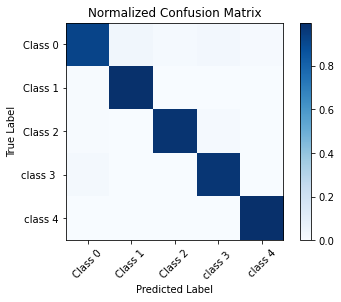

In [41]:
import xgboost as xgb
# Create an instance of the XGBClassifier class
clf = xgb.XGBClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the accuracy for each class label
accuracy_per_class = {}
for i in range(len(cm)):
    tp = cm[i,i]
    fp = sum(cm[:,i]) - tp
    fn = sum(cm[i,:]) - tp
    accuracy_per_class[i] = tp / (tp + fp + fn)

print("Accuracy per class:", accuracy_per_class)



# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'class 3 ', ' class 4']

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.9737333333333333
[[2737  103   38   69   29]
 [  22 2969    1    0    0]
 [  11    0 2927   42    0]
 [  61    3   11 2917    0]
 [   3    0    1    0 3056]]
Accuracy per class: {0: 0.8906605922551253, 1: 0.9583602324080052, 2: 0.9656878917848895, 3: 0.9400580083789881, 4: 0.9893169310456459}


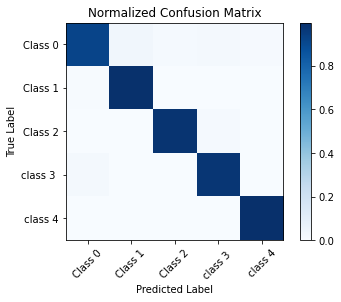

In [42]:
from sklearn.ensemble import VotingClassifier
# Create the individual classifiers
clf1 = xgb.XGBClassifier()
clf2 = DecisionTreeClassifier()
clf3 = SVC()
clf4 = KNeighborsClassifier(n_neighbors=5 , metric= 'minkowski' , p = 2)

# Create the ensemble classifier
ensemble = VotingClassifier(estimators=[('xgbst', clf1), ('dt', clf2), ('svm', clf3) , ('knc', clf4)], voting='hard')

# Fit the ensemble classifier to the data
ensemble.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = ensemble.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the accuracy for each class label
accuracy_per_class = {}
for i in range(len(cm)):
    tp = cm[i,i]
    fp = sum(cm[:,i]) - tp
    fn = sum(cm[i,:]) - tp
    accuracy_per_class[i] = tp / (tp + fp + fn)

print("Accuracy per class:", accuracy_per_class)



# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'class 3 ', ' class 4']

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()